# pyMC sandbox

Follow the tutorial from: https://pymc-devs.github.io/pymc/tutorial.html

In [29]:
%matplotlib inline
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt

In [27]:
disasters =   \
     np.array([ 4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6,
                   3, 3, 5, 4, 5, 3, 1, 4, 4, 1, 5, 5, 3, 4, 2, 5,
                   2, 2, 3, 4, 2, 1, 3, 2, 2, 1, 1, 1, 1, 3, 0, 0,
                   1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 1,
                   0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2,
                   3, 3, 1, 1, 2, 1, 1, 1, 1, 2, 4, 2, 0, 0, 1, 4,
                   0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1])

<Container object of 111 artists>

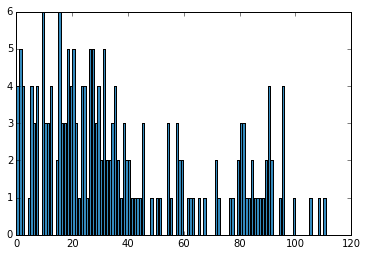

In [40]:
plt.bar(np.arange(len(disasters)), disasters, color="#348ABD")

In [31]:
switchpoint = pm.DiscreteUniform('switchpoint', lower=0, upper=len(disasters), doc='Switchpoint[year]')

In [23]:
early_mean = pm.Exponential('early_mean', beta=1.)
late_mean = pm.Exponential('late_mean', beta=1.)

In [36]:
@pm.deterministic(plot=False)
def rate(s=switchpoint, e=early_mean, l=late_mean):
    ''' Concatenate Poisson means '''
    out = np.empty(len(disasters))
    out[:s] = e
    out[s:] = l
    return out

In [38]:
pm.DiscreteUniform??